In [1]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
import numpy as np
from cwgangp import ConditionalWGAN_GP

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])
all_labels = keras.utils.to_categorical(all_labels, 10)
all_digits = (all_digits.astype("float32") - 127.5) / 127.5
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))

generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
discriminator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)

# Define the loss functions for the discriminator,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def critic_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)

# Set the number of epochs for training.
epochs = 20

# Get the wgan model
wgan = ConditionalWGAN_GP(128,10,28)

# Compile the wgan model
wgan.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=critic_loss,
)

# Start training
wgan.fit(all_digits, all_labels, batch_size=32, epochs=epochs)


Epoch 1/20
2188/2188 [==============================] - 77s 31ms/step - d_loss: -1.6102 - g_loss: -2.5012
Epoch 2/20
2188/2188 [==============================] - 68s 31ms/step - d_loss: -0.7821 - g_loss: -2.2454
Epoch 3/20
2188/2188 [==============================] - 69s 32ms/step - d_loss: -0.6298 - g_loss: -5.3353
Epoch 4/20
2188/2188 [==============================] - 69s 31ms/step - d_loss: -0.4570 - g_loss: -6.7326
Epoch 5/20
2188/2188 [==============================] - 69s 31ms/step - d_loss: -0.4095 - g_loss: -7.7729
Epoch 6/20
2188/2188 [==============================] - 68s 31ms/step - d_loss: -0.3937 - g_loss: -8.2930
Epoch 7/20
2188/2188 [==============================] - 69s 32ms/step - d_loss: -0.3581 - g_loss: -10.6233
Epoch 8/20
2188/2188 [==============================] - 69s 31ms/step - d_loss: -0.3391 - g_loss: -4.5325
Epoch 9/20
2188/2188 [==============================] - 68s 31ms/step - d_loss: -0.2884 - g_loss: -0.2245
Epoch 10/20
2188/2188 [======================

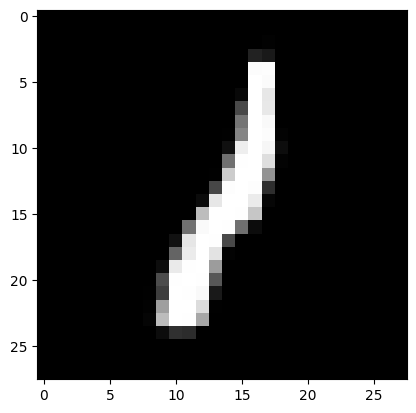

In [3]:
from matplotlib import pyplot as plt
from PIL import Image

random_latent_vectors = tf.random.normal(shape=(1, 128))
label = [[0,1,0,0,0,0,0,0,0,0]]

gen = wgan.generator(tf.concat([random_latent_vectors,label],axis=1))
img = np.squeeze(gen[0])*127.5+127.5
plt.imshow(img,cmap='gray')